# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.decomposition as dec
import scipy as sp
import numpy as np
import csv
from alpha_vantage.timeseries import TimeSeries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
stocks = ['AAPL']
daily_dates = ['timestamp', '2016-04-29', '2016-04-28', '2016-04-27', '2016-04-26',
         '2016-04-25', '2016-04-22', '2016-04-21', '2016-04-20', '2016-04-19', 
         '2016-04-18', '2016-04-15', '2016-04-14', '2016-04-13', '2016-04-12',
         '2016-04-11', '2016-04-08', '2016-04-07', '2016-04-06', '2016-04-05',
         '2016-04-04', '2016-04-01']

for stock in stocks:
    ts = TimeSeries(key='TTZNA7B3VCDYYHNZ', output_format='csv')
    data, meta_data = ts.get_daily_adjusted(stock, outputsize='full')
    with open('{}-daily-prices.csv'.format(stock), mode='w+', newline='') as my_file:
        for row in data:
            if row[0] in daily_dates:
                wr = csv.writer(my_file, quoting=csv.QUOTE_ALL)
                wr.writerow(row)


# Retrieve and Process Tweets

In [3]:
tweets = pd.read_csv('aapl-twitter-stream.csv').to_dict('series')

In [4]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+) | (http*\S+)", " ", tweet).split())

In [5]:
daily_clean_tweets = []
for i in range(len(tweets['Date'])):
    if tweets['Date'][i] in daily_dates:
        daily_clean_tweets.append([tweets['Date'][i], clean_tweet(tweets['Tweet content'][i]), tweets['RTs'][i], tweets['Favs'][i]])

In [6]:
clean_tweets = []
for tweet in daily_clean_tweets:
    clean_tweets.append(tweet[1])

In [8]:
count = CountVectorizer(stop_words='english', max_df=0.98, min_df=0.01)
df_bag = count.fit_transform(clean_tweets)
feature_names = count.get_feature_names()
feature_wts = sp.sparse.csr_matrix.sum(df_bag, axis=0)
feature_wts = np.array(feature_wts).flatten()
n_top_words = 50 
ll = (" ".join([feature_names[i] for i in feature_wts.argsort()[:-n_top_words - 1:-1]]))
print(" ".join([feature_names[i] for i in feature_wts.argsort()[:-n_top_words - 1:-1]]))

aapl apple rt fb https read spy iphone stocks amzn goog twtr tsla stock buy billion earnings qqq amp nflx new msft trading market watch googl cash sales spx fed today twitter 233 tesla best investing 10 day time just 18 100 china sell oil 2016 yahoo netflix says uber


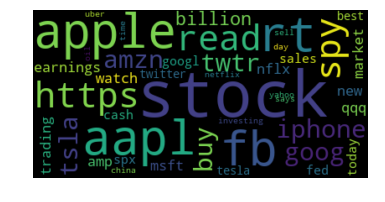

In [11]:
wordcloud = WordCloud().generate(ll)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# LDA Model
Top words that appear

In [8]:
lda = dec.LatentDirichletAllocation(n_components=3)
lda.fit(df_bag)
n_top_words = 20
for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d: " % topic_idx, end='')
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic 0: aapl stocks rt buy billion trading apple cash twitter 233 tesla investing fb 18 yahoo netflix uber airbnb lef long
Topic 1: aapl apple rt read iphone https earnings sales stock amp just watch china new time today 10 says oil market
Topic 2: aapl rt fb spy amzn goog tsla qqq twtr https nflx msft googl stock spx amp new best 100 market


In [9]:
count = CountVectorizer(stop_words='english', max_df=0.98, min_df=0.01)
df_bag = count.fit_transform(clean_tweets)
feature_names = count.get_feature_names()
lda = dec.LatentDirichletAllocation(n_components=3)
lda.fit(df_bag)
n_top_words = 20
for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d: " % topic_idx, end='')
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic 0: aapl apple rt read https iphone stock earnings new sales best 10 china watch just time says cannabis revenue ubqu
Topic 1: aapl fb rt spy amzn stocks tsla goog twtr nflx msft qqq trading googl spx like ibb market gm dia
Topic 2: rt aapl buy billion amp apple https cash fed twitter 233 tesla investing 18 100 oil yahoo netflix uber airbnb


In [10]:
feature_wts = sp.sparse.csr_matrix.sum(df_bag, axis=0)
feature_wts = np.array(feature_wts).flatten()
n_top_words = 50 
print(" ".join([feature_names[i] for i in feature_wts.argsort()[:-n_top_words - 1:-1]]))

aapl apple rt fb https read spy iphone stocks amzn goog twtr tsla stock buy billion earnings qqq amp nflx new msft trading market watch googl cash sales spx fed today twitter 233 tesla best investing 10 day time just 18 100 china sell oil 2016 yahoo netflix says uber


# Sentiment Analysis

In [8]:
analyser = SentimentIntensityAnalyzer()
sentiment = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    sentiment.append([date, tweet, analyser.polarity_scores(tweet)])
print(len(sentiment))

63356


In [9]:
print(daily_clean_tweets[:10])

[['2016-04-29', 'BREAKING Apple introduces iPhone 6 iPhone 6 plus $AAPL', nan, nan], ['2016-04-29', 'RT $SPX ROADMAP 2016 #STOCKMARKET $INTC $F $SPY $AAPL $AMZN $C $VIX $FB $TWTR $GOOGL $UVXY $FAZ $FEZ $MSFT $GS $BAC $AA', 14.0, nan], ['2016-04-29', 'Apple to partner with Coach on new leather Apple Watch bands coming as #AppleInsider $AAPL', nan, nan], ['2016-04-29', '$SYNA Drops 12 Amidst #Apple Woes China Rumors Where is the Samsung Upside $AAPL', nan, nan], ['2016-04-29', 'RT Amazon earned $513 million last quarter Apple made that in less than 5 days $AAPL $AMZN', 18.0, nan], ['2016-04-29', 'RT $SPX ROADMAP 2016 #STOCKMARKET $INTC $F $SPY $AAPL $AMZN $C $VIX $FB $TWTR $GOOGL $UVXY $FAZ $FEZ $MSFT $GS $BAC $AA', 10.0, nan], ['2016-04-29', "RT If $AAPL fell $10 further and sat there for 3-years it's cash would equal it's market capitalization A year like last…", 1.0, nan], ['2016-04-29', 'RT ICYMI Hedge and Stock Alt review $AAPL .. read more -&gt', 1.0, nan], ['2016-04-29', 'RT $AAPL

In [10]:
analyser = SentimentIntensityAnalyzer()
sentiment_rt = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    rt = daily_clean_tweets[i][2]
    if rt > 20:
        sentiment_rt.append([date, tweet, analyser.polarity_scores(tweet), rt])
print(len(sentiment_rt))

9099


In [12]:
analyser = SentimentIntensityAnalyzer()
sentiment_fav = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    fav = daily_clean_tweets[i][3]
    if fav > 10:
        sentiment_fav.append([date, tweet, analyser.polarity_scores(tweet), fav])
print(len(sentiment_fav))

350


In [11]:
analyser = SentimentIntensityAnalyzer()
sentiment_rt_fav = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    fav = daily_clean_tweets[i][3]
    rt = daily_clean_tweets[i][2]
    if rt > 20 and fav > 10:
        sentiment_rt_fav.append([date, tweet, analyser.polarity_scores(tweet), fav, rt])
print(len(sentiment_rt_fav))

118


In [13]:
#This code classify each tweets into postive,negative or neutral for each day
def get_sentiment_count_on_dates(sent_list, date):
    positive = 0
    neutral = 0
    negative = 0
    dates = [date]
    for i in range(len(sent_list)):
        if sent_list[i][0] in dates:
            if sent_list[i][2].get('compound') >= 0.05:
                positive += 1
            elif sent_list[i][2].get('compound') <= -0.05:
                negative += 1
            else:
                neutral += 1
    return positive, neutral, negative

In [14]:
# Day 2016-04-11 shows how many postive, neutral and negative tweets were made about apple
positive, neutral, negative = get_sentiment_count_on_dates(sentiment, '2016-04-11')
print('Positive Tweets: {}\nNeutral Tweets: {}\nNegative Tweets: {}'.format(positive, neutral, negative))

Positive Tweets: 678
Neutral Tweets: 1044
Negative Tweets: 277


In [15]:
#shows the movement of stock price

tweet_movement = []
fake_price = 0

for date in daily_dates:
    positive, neutral, negative = get_sentiment_count_on_dates(sentiment, date)
    print('positive: {} negative {}'.format(positive, negative))
    if (positive > negative + 200):   #If positive tweets are 200 more than negative tweets the movement will be +1
        fake_price += 1
        tweet_movement.append(fake_price)
    elif (positive > negative + 50):  #If positive tweets are 50 more than negative tweets the movement will be +0.5
        print('half value')
        fake_price += .5
        tweet_movement.append(fake_price) 
    elif (negative > positive + 200): #If negative tweets are 200 more than positive tweets the movement will be -1
        fake_price -= 1
        tweet_movement.append(fake_price) 
    elif (negative > positive + 50): #If negative tweets are 50 more than positive tweets the movement will be -0.5
        print('half_value')
        fake_price -= -.5
        tweet_movement.append(fake_price)
    else:
        tweet_movement.append(fake_price) #Its neutral

positive: 0 negative 0
positive: 1077 negative 746
positive: 1897 negative 1161
positive: 3234 negative 2212
positive: 2563 negative 2302
positive: 706 negative 632
half value
positive: 494 negative 401
half value
positive: 626 negative 486
half value
positive: 590 negative 412
half value
positive: 716 negative 481
positive: 733 negative 517
positive: 935 negative 595
positive: 588 negative 228
positive: 680 negative 217
positive: 768 negative 217
positive: 678 negative 277
positive: 727 negative 314
positive: 767 negative 427
positive: 542 negative 196
positive: 403 negative 208
half value
positive: 656 negative 251
positive: 0 negative 0


In [16]:
rt_tweet_movement = []
fake_price = 0

for date in daily_dates:
    positive, neutral, negative = get_sentiment_count_on_dates(sentiment_rt, date)
    print('positive: {} negative {}'.format(positive, negative))
    if (positive > negative + 10):
        fake_price += 1
        rt_tweet_movement.append(fake_price)
    elif (positive > negative + 5):
        fake_price += .5
        rt_tweet_movement.append(fake_price)
    elif (negative > positive + 10):
        fake_price -= 1
        rt_tweet_movement.append(fake_price)
    elif (negative > positive + 5):
        fake_price -= -.5
        rt_tweet_movement.append(fake_price)
    else:
        rt_tweet_movement.append(fake_price)

positive: 0 negative 0
positive: 85 negative 74
positive: 601 negative 95
positive: 1137 negative 264
positive: 208 negative 210
positive: 47 negative 87
positive: 24 negative 7
positive: 10 negative 4
positive: 55 negative 29
positive: 42 negative 36
positive: 43 negative 5
positive: 194 negative 34
positive: 3 negative 5
positive: 0 negative 0
positive: 1 negative 0
positive: 13 negative 8
positive: 3 negative 4
positive: 8 negative 61
positive: 4 negative 0
positive: 0 negative 1
positive: 2 negative 1
positive: 0 negative 0


In [17]:
fav_tweet_movement = []
fake_price = 0

for date in daily_dates:
    positive, neutral, negative = get_sentiment_count_on_dates(sentiment_fav, date)
    print('positive: {} negative {}'.format(positive, negative))
    if (positive > negative + 3):
        fake_price += 1
        fav_tweet_movement.append(fake_price)
    elif (positive > negative):
        fake_price += .5
        fav_tweet_movement.append(fake_price)
    elif (negative > positive + 3):
        fake_price -= 1
        fav_tweet_movement.append(fake_price)
    elif (negative > positive):
        fake_price -= -.5
        fav_tweet_movement.append(fake_price)
    else:
        fav_tweet_movement.append(fake_price)

positive: 0 negative 0
positive: 8 negative 6
positive: 13 negative 10
positive: 21 negative 25
positive: 28 negative 23
positive: 3 negative 5
positive: 0 negative 2
positive: 1 negative 1
positive: 1 negative 2
positive: 4 negative 3
positive: 0 negative 3
positive: 7 negative 6
positive: 4 negative 1
positive: 0 negative 2
positive: 1 negative 0
positive: 3 negative 0
positive: 3 negative 0
positive: 5 negative 4
positive: 3 negative 0
positive: 1 negative 0
positive: 5 negative 0
positive: 0 negative 0


In [18]:
rt_fav_tweet_movement = []
fake_price = 0

for date in daily_dates:
    positive, neutral, negative = get_sentiment_count_on_dates(sentiment_rt_fav, date)
    print('positive: {} negative {}'.format(positive, negative))
    if (positive > negative + 3):
        fake_price += 1
        rt_fav_tweet_movement.append(fake_price)
    elif (positive > negative):
        fake_price += .5
        rt_fav_tweet_movement.append(fake_price)
    elif (negative > positive + 3):
        fake_price -= 1
        rt_fav_tweet_movement.append(fake_price)
    elif (negative > positive):
        fake_price -= -.5
        rt_fav_tweet_movement.append(fake_price)
    else:
        rt_fav_tweet_movement.append(fake_price)

positive: 0 negative 0
positive: 3 negative 1
positive: 5 negative 4
positive: 7 negative 4
positive: 6 negative 9
positive: 1 negative 2
positive: 0 negative 1
positive: 1 negative 0
positive: 0 negative 1
positive: 1 negative 2
positive: 0 negative 0
positive: 2 negative 1
positive: 2 negative 1
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 2
positive: 2 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0


In [20]:
stocks = pd.read_csv('AAPL-daily-prices.csv').to_dict('series')

In [21]:
stock_prices = []
for stock in stocks['close']:
    stock_prices.append(stock)
stock_prices.reverse()

In [22]:
stock_dates = []
for stock in stocks['timestamp']:
    stock_dates.append(stock)
stock_dates.reverse()

Below code:
It looks at the current stock price and the stock price for the day ahead and checks for the difference in price. If the day ahead is greater it adds 1 to the movement. If the price goes down it subtracts 1 from the movement and if it’s the same then the movement doesn’t change

In [23]:
stock_movement = []    
fake_price = 0
for i in range(len(stock_prices) - 1):
    if (stock_prices[i + 1] > stock_prices[i]):
        fake_price += 1
        stock_movement.append(fake_price)
    elif (stock_prices[i] > stock_prices[i + 1]):
        fake_price -= 1
        stock_movement.append(fake_price)
    else:
        stock_movement.append(fake_price)

In [25]:
print(tweet_movement)
print(rt_tweet_movement)
print(fav_tweet_movement)
print(rt_fav_tweet_movement)
print(stock_movement)

[0, 1, 2, 3, 4, 4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 16.5, 17.5, 17.5]
[0, 1, 2, 3, 3, 2, 3, 3.5, 4.5, 5.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[0, 0.5, 1.0, 0.0, 1.0, 1.5, 2.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 9.0, 9.0]
[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 4.5, 5.0, 5.5, 5.5, 5.5, 5.5, 5.5, 6.0, 6.5, 6.5, 6.5, 6.5]
[1, 0, 1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 3, 2, 1, 0, -1, -2, -3, -4]


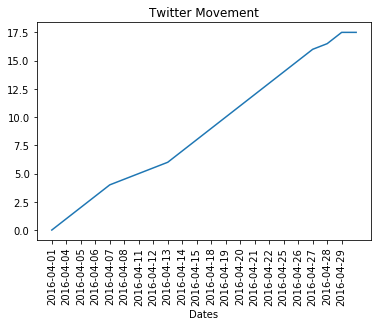

In [18]:
plt.plot(tweet_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.title('Twitter Movement')
plt.show()

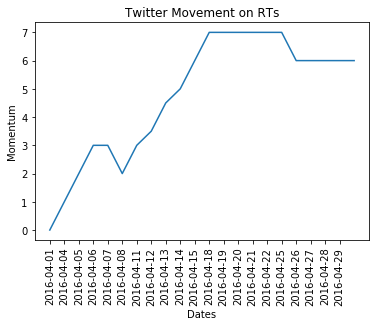

In [26]:
plt.plot(rt_tweet_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.ylabel('Momentum')
plt.title('Twitter Movement on RTs')
plt.show()

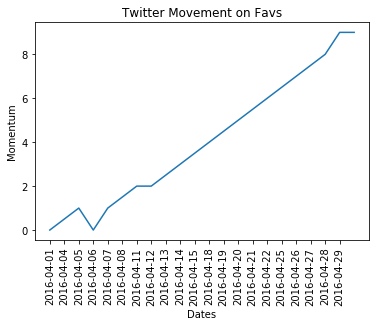

In [27]:
plt.plot(fav_tweet_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.ylabel('Momentum')
plt.title('Twitter Movement on Favs')
plt.show()

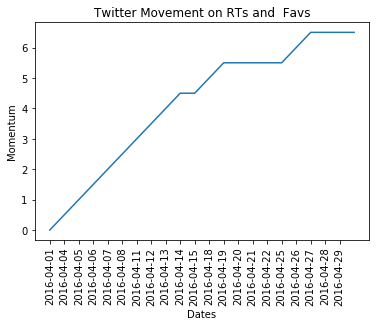

In [28]:
plt.plot(rt_fav_tweet_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.ylabel('Momentum')
plt.title('Twitter Movement on RTs and  Favs')
plt.show()

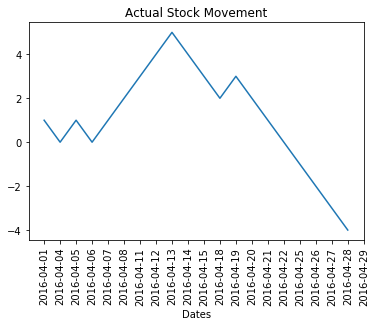

In [19]:
plt.plot(stock_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.title('Actual Stock Movement')
plt.show()

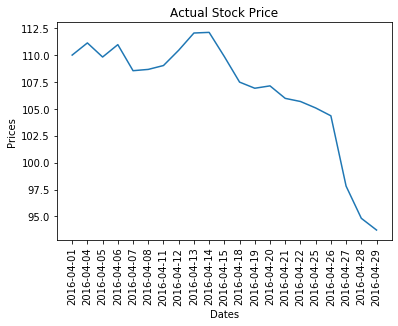

In [20]:
plt.plot(stock_prices)
plt.xlabel('Dates')
plt.ylabel('Prices')
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.title('Actual Stock Price')
plt.show()

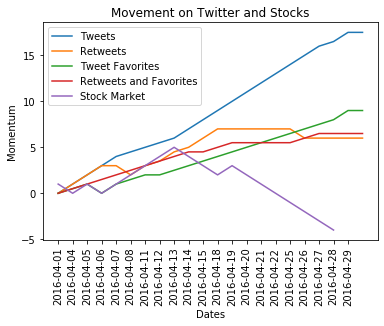

In [29]:
# plt.plot(tweet_movement, stock_dates, rt_tweet_movement, stock_dates)
plt.plot(tweet_movement, label="Tweets")
plt.plot(rt_tweet_movement, label="Retweets")
plt.plot(fav_tweet_movement, label="Tweet Favorites")
plt.plot(rt_fav_tweet_movement, label="Retweets and Favorites")
plt.plot(stock_movement, label='Stock Market')
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.ylabel('Momentum')
plt.title('Movement on Twitter and Stocks')
plt.legend()
plt.show()

In [ ]:
adsk-twitter-stream.csv

In [2]:
stocks = ['ADSK']
daily_dates = ['timestamp', '2016-06-15', '2016-06-14', '2016-06-13', '2016-06-12',
         '2016-06-11', '2016-06-10', '2016-06-09', '2016-06-08', '2016-06-07', 
         '2016-06-05', '2016-06-04', '2016-06-03', '2016-06-02', '2016-06-01',

               
         '2016-05-31', '2016-05-30', '2016-05-29', '2016-05-28','2016-05-27','2016-05-26',
         '2016-05-25', '2016-05-24', '2016-05-23','2016-05-22','2016-05-21', '2016-05-20', '2016-05-19', 
         '2016-05-18', '2016-05-17','2016-05-16','2016-05-15', '2016-05-14', '2016-05-13', '2016-05-12',
         '2016-05-11', '2016-05-10','2016-05-09','2016-05-08', '2016-05-07', '2016-05-06', '2016-05-05',
         '2016-05-04', '2016-05-03','2016-05-02', '2016-05-01',     
               
         '2016-04-30', '2016-04-29', '2016-04-28','2016-04-27','2016-04-26',
         '2016-04-25', '2016-04-24', '2016-04-23','2016-04-22','2016-04-21', '2016-04-20', '2016-04-19', 
         '2016-04-18', '2016-04-17','2016-04-16','2016-04-15', '2016-04-14', '2016-04-13', '2016-04-12',
         '2016-04-11', '2016-04-10','2016-04-09','2016-04-08', '2016-04-07', '2016-04-06', '2016-04-05',
         '2016-04-04', '2016-04-03','2016-04-02', '2016-04-01',
               
               
               
         '2016-03-31', '2016-03-30', '2016-03-29', '2016-03-28','2016-03-27'                    
              ]

for stock in stocks:
    ts = TimeSeries(key='TTZNA7B3VCDYYHNZ', output_format='csv')
    data, meta_data = ts.get_daily_adjusted(stock, outputsize='full')
    with open('{}-daily-prices.csv'.format(stock), mode='w+', newline='') as my_file:
        for row in data:
            if row[0] in daily_dates:
                wr = csv.writer(my_file, quoting=csv.QUOTE_ALL)
                wr.writerow(row)

In [3]:
tweets = pd.read_csv('adsk-twitter-stream.csv').to_dict('series')

In [4]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+) | (http*\S+)", " ", tweet).split())

In [5]:
daily_clean_tweets = []
for i in range(len(tweets['Date'])):
    if tweets['Date'][i] in daily_dates:
        daily_clean_tweets.append([tweets['Date'][i], clean_tweet(tweets['Tweet content'][i]), tweets['RTs'][i], tweets['Favs'][i]])

In [6]:
clean_tweets = []
for tweet in daily_clean_tweets:
    clean_tweets.append(tweet[1])

In [7]:
count = CountVectorizer(stop_words='english', max_df=0.98, min_df=0.01)
df_bag = count.fit_transform(clean_tweets)
feature_names = count.get_feature_names()
feature_wts = sp.sparse.csr_matrix.sum(df_bag, axis=0)
feature_wts = np.array(feature_wts).flatten()
n_top_words = 50 
xll = (" ".join([feature_names[i] for i in feature_wts.argsort()[:-n_top_words - 1:-1]]))


In [8]:
print(xll)

autodesk https rt stocks stock trading earnings nasdaq aapl shares rating new amat amp adbe sells gps 00 rost 000 sell list watch price nasdaq100 buy 2016 read investment ydsijfjqhf 16 calls mu signal stockmarket analysts eps position nflx q1 57 tsla ment trade twtr reiterated research trend swing brcd


In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:

# Display the generated image:


In [10]:
wordcloud = WordCloud().generate(xll)

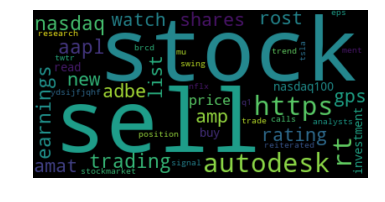

In [11]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
analyser = SentimentIntensityAnalyzer()
sentiment = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    sentiment.append([date, tweet, analyser.polarity_scores(tweet)])
print(len(sentiment))

1112


In [13]:
print(daily_clean_tweets[:10])

[['2016-06-15', 'RT Make Shorting Great Again $ADI $AL $F $FCX $GM $GME $KAR $KMX $LAZ $ADSK $EXPE', 1.0, nan], ['2016-06-15', 'Make Shorting Great Again $ADI $AL $F $FCX $GM $GME $KAR $KMX $LAZ $ADSK $EXPE', 1.0, nan], ['2016-06-15', 'Aroon Negative $IHS $VRTS $PRU $WBMD $ADSK $PDCE $PCRX $TREX $SATS $SCSC $PCH $SNN $WSBC $FTI $FNGN $EWP $PFGC', nan, nan], ['2016-06-14', '$ADSK:US Trimble (TRMB) Autodesk (ADSK Agree to Increase Interoperability #AUTODESK INC #NASDAQ', nan, nan], ['2016-06-14', 'Make Shorting Great Again $ADI $AL $F $FCX $GM $GME $KAR $KMX $LAZ $ADSK $EXPE', nan, nan], ['2016-06-14', '$TRMB and $ADSK plan to increase interoperability https://t.co/rm6dmdtLAA', nan, nan], ['2016-06-14', '#FusionIQ NEW Negative Timing Signal on $ADSK Today Please Retweet #Signals', nan, nan], ['2016-06-14', 'Autodesk hits a 1 quarter low $ADSK #Autodesk', nan, nan], ['2016-06-14', '$TRMB $ADSK: Autodesk and Trimble Sign Agreement to Increase Interoperability: https://t.co/cnClMhJcDt', nan

In [14]:
#This code classify each tweets into postive,negative or neutral for each day
def get_sentiment_count_on_dates(sent_list, date):
    positive = 0
    neutral = 0
    negative = 0
    dates = [date]
    for i in range(len(sent_list)):
        if sent_list[i][0] in dates:
            if sent_list[i][2].get('compound') >= 0.05:
                positive += 1
            elif sent_list[i][2].get('compound') <= -0.05:
                negative += 1
            else:
                neutral += 1
    return positive, neutral, negative

In [15]:
# Day 2016-04-11 shows how many postive, neutral and negative tweets were made about apple
positive, neutral, negative = get_sentiment_count_on_dates(sentiment, '2016-04-11')
print('Positive Tweets: {}\nNeutral Tweets: {}\nNegative Tweets: {}'.format(positive, neutral, negative))

Positive Tweets: 2
Neutral Tweets: 1
Negative Tweets: 0


In [16]:
#shows the movement of stock price

tweet_movement = []
fake_price = 0

for date in daily_dates:
    positive, neutral, negative = get_sentiment_count_on_dates(sentiment, date)
    print('positive: {} negative {}'.format(positive, negative))
    if (positive > negative + 20):   #If positive tweets are 200 more than negative tweets the movement will be +1
        fake_price += 1
        tweet_movement.append(fake_price)
    elif (positive > negative + 10):  #If positive tweets are 50 more than negative tweets the movement will be +0.5
        print('half value')
        fake_price += .5
        tweet_movement.append(fake_price) 
    elif (negative > positive + 20): #If negative tweets are 200 more than positive tweets the movement will be -1
        fake_price -= 1
        tweet_movement.append(fake_price) 
    elif (negative > positive + 10): #If negative tweets are 50 more than positive tweets the movement will be -0.5
        print('half_value')
        fake_price -= -.5
        tweet_movement.append(fake_price)
    else:
        tweet_movement.append(fake_price) #Its neutral

positive: 0 negative 0
positive: 2 negative 1
positive: 5 negative 2
positive: 1 negative 0
positive: 1 negative 0
positive: 2 negative 0
positive: 4 negative 0
positive: 4 negative 0
positive: 1 negative 0
positive: 3 negative 0
positive: 0 negative 0
positive: 2 negative 0
positive: 1 negative 0
positive: 1 negative 0
positive: 1 negative 4
positive: 7 negative 0
positive: 4 negative 0
positive: 0 negative 0
positive: 2 negative 0
positive: 2 negative 0
positive: 3 negative 0
positive: 4 negative 3
positive: 6 negative 0
positive: 6 negative 6
positive: 0 negative 0
positive: 1 negative 2
positive: 12 negative 7
positive: 15 negative 23
positive: 9 negative 1
positive: 4 negative 0
positive: 9 negative 0
positive: 5 negative 3
positive: 0 negative 0
positive: 7 negative 0
positive: 10 negative 0
positive: 3 negative 0
positive: 1 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 1 negative 0
positive: 11 negative 0
half value
positive: 3 negative 0
positive: 2 negati

In [17]:
stocks = pd.read_csv('ADSK-daily-prices.csv').to_dict('series')

In [18]:
stock_prices = []
for stock in stocks['close']:
    stock_prices.append(stock)
stock_prices.reverse()

In [19]:
stock_dates = []
for stock in stocks['timestamp']:
    stock_dates.append(stock)
stock_dates.reverse()

In [20]:
stock_movement = []    
fake_price = 0
for i in range(len(stock_prices) - 1):
    if (stock_prices[i + 1] > stock_prices[i]):
        fake_price += 1
        stock_movement.append(fake_price)
    elif (stock_prices[i] > stock_prices[i + 1]):
        fake_price -= 1
        stock_movement.append(fake_price)
    else:
        stock_movement.append(fake_price)

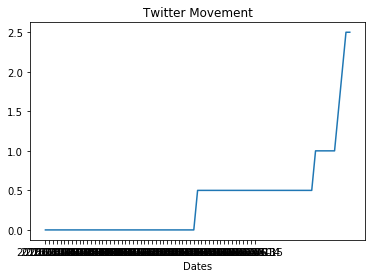

In [21]:
plt.plot(tweet_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi,stock_dates)
plt.xlabel('Dates')
plt.title('Twitter Movement')
plt.show()

In [22]:
analyser = SentimentIntensityAnalyzer()
sentiment_rt = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    rt = daily_clean_tweets[i][2]
    if rt > 20:
        sentiment_rt.append([date, tweet, analyser.polarity_scores(tweet), rt])
print(len(sentiment_rt))

0


In [23]:
analyser = SentimentIntensityAnalyzer()
sentiment_fav = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    fav = daily_clean_tweets[i][3]
    if fav > 10:
        sentiment_fav.append([date, tweet, analyser.polarity_scores(tweet), fav])
print(len(sentiment_fav))

1


In [24]:
analyser = SentimentIntensityAnalyzer()
sentiment_rt_fav = []
for i in range(len(daily_clean_tweets)):
    date = daily_clean_tweets[i][0]
    tweet = daily_clean_tweets[i][1]
    fav = daily_clean_tweets[i][3]
    rt = daily_clean_tweets[i][2]
    if rt > 20 and fav > 10:
        sentiment_rt_fav.append([date, tweet, analyser.polarity_scores(tweet), fav, rt])
print(len(sentiment_rt_fav))

0


In [25]:
stock_movement = []    
fake_price = 0
for i in range(len(stock_prices) - 1):
    if (stock_prices[i + 1] > stock_prices[i]):
        fake_price += 1
        stock_movement.append(fake_price)
    elif (stock_prices[i] > stock_prices[i + 1]):
        fake_price -= 1
        stock_movement.append(fake_price)
    else:
        stock_movement.append(fake_price)

In [26]:
rt_tweet_movement = []
fake_price = 0

for date in daily_dates:
    positive, neutral, negative = get_sentiment_count_on_dates(sentiment_rt, date)
    print('positive: {} negative {}'.format(positive, negative))
    if (positive > negative + 10):
        fake_price += 1
        rt_tweet_movement.append(fake_price)
    elif (positive > negative + 5):
        fake_price += .5
        rt_tweet_movement.append(fake_price)
    elif (negative > positive + 10):
        fake_price -= 1
        rt_tweet_movement.append(fake_price)
    elif (negative > positive + 5):
        fake_price -= -.5
        rt_tweet_movement.append(fake_price)
    else:
        rt_tweet_movement.append(fake_price)

positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0 negative 0
positive: 0

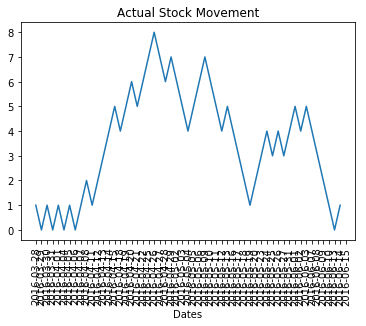

In [27]:
plt.plot(stock_movement)
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.xlabel('Dates')
plt.title('Actual Stock Movement')
plt.show()

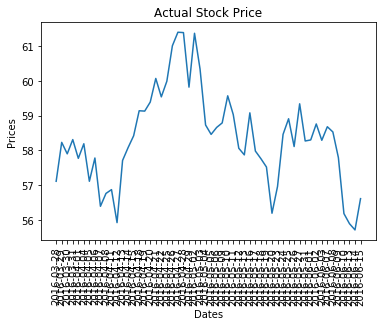

In [28]:
plt.plot(stock_prices)
plt.xlabel('Dates')
plt.ylabel('Prices')
xi = [i for i in range(0, len(stock_dates))]
plt.xticks(xi, stock_dates, rotation=90)
plt.title('Actual Stock Price')
plt.show()